In [111]:
import networkx as nx
import torch
from clrs._src.algorithms.graphs import bfs
import os.path as osp
import numpy as np

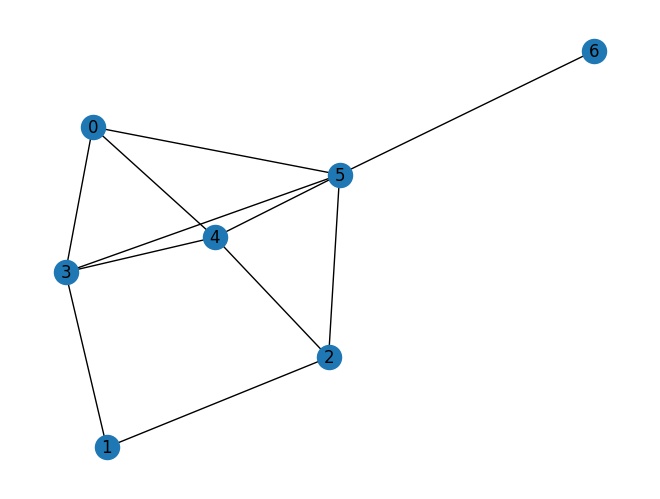

In [112]:
g = nx.read_edgelist('./data/medium/raw/er_graph_0.edgelist')
g = nx.from_edgelist(g.edges())
nx.draw(g, with_labels=True)

In [113]:
max_node = max(g.nodes(), default=0)

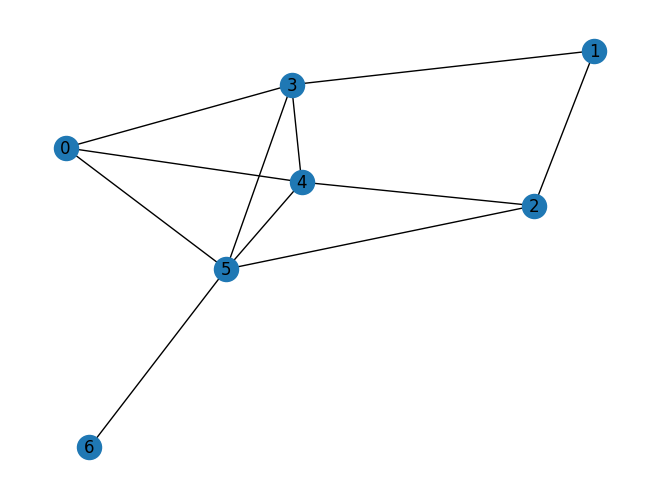

In [114]:
for m in range(int(max_node)+1):
    if str(m) not in g.nodes():
        g.add_node(str(m))
nx.draw(g, with_labels=True)

In [115]:
adj = nx.to_numpy_array(g)
node_index = [int(x) for x in g.nodes()]
# correcting adj
permutation = [node_index.index(i) for i in range(len(node_index))]
adj = adj[:, permutation][permutation, :]

In [116]:
adj

array([[0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0.],
       [1., 1., 0., 0., 1., 1., 0.],
       [1., 0., 1., 1., 0., 1., 0.],
       [1., 0., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.]])

In [117]:
edges_list_int = [(int(u), int(v)) for u, v in list(g.edges())]
edge_index = torch.tensor(edges_list_int).t().contiguous()
edge_index

tensor([[0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1],
        [3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2]])

In [118]:
edges_list_int = [(int(u), int(v)) for u, v in list(g.edges())]
edges_list_int = edges_list_int + [(v, u) for u, v in edges_list_int]
edge_index = torch.tensor(edges_list_int).t().contiguous()
edge_index

tensor([[0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1, 3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2],
        [3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2, 0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1]])

In [119]:
s = np.random.randint(0, len(adj))
s

1

In [124]:
pi, probes = bfs(adj, s)
pi

array([3, 1, 1, 1, 2, 2, 5])

In [125]:
probes['hint']['node']['pi_h']['data'][-1]

array([3, 1, 1, 1, 2, 2, 5])

In [126]:
pi

array([3, 1, 1, 1, 2, 2, 5])

In [127]:
def find_edge_index(edge_index, src, des):
    for idx, (s, d) in enumerate(zip(edge_index[0], edge_index[1])):
        if s == src and d == des:
            return idx

In [128]:
def get_edges(pi, edge_index):
    edges = np.zeros_like(edge_index[0])
    for i in range(len(pi)):
        src = pi[i]
        des = i 
        if src != des:
            edges[find_edge_index(edge_index, src, des)] = 1
    return edges

In [129]:
edges = get_edges(pi, edge_index) # edges that have been traversed
edges

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

In [78]:
edge_index

tensor([[0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1, 3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2],
        [3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2, 0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1]])

In [ ]:
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1]

[0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1, 3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2]
[3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2, 0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1]

In [52]:
pi_h = probes['hint']['node']['pi_h']['data'] # parents hints
edges = get_edges(pi, edge_index) # edges that have been traversed
edges_h = np.array([get_edges(x, edge_index) for x in pi_h]) # edges traversed hints

In [53]:
reach_h = probes['hint']['node']['reach_h']['data']

In [54]:
edge_index

tensor([[0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1, 3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2],
        [3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2, 0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1]])

In [55]:
pos = np.arange(0, len(adj)) / len(adj)
length = pi_h.shape[0]

In [56]:
tmp = np.zeros(len(adj))
tmp[s] = 1
s = tmp
s

array([0., 0., 0., 0., 0., 0., 1.])

In [ ]:
dict_ = {'edge_index': edge_index, 'pos': pos, 'length': length, 's': s, 'pi': pi, 'reach_h': reach_h, 'pi_h': pi_h, 'edges': edges, 'edges_h' : edges_h}
dict_ = {k: self.to_torch(v) for k, v in dict_.items()}
dict_['hints'] = np.array(['reach_h', 'pi_h', 'edges_h'])
dict_['inputs'] = np.array(['pos', 's'])
dict_['outputs'] = np.array(['edges'])
tensor = CLRSData(**dict_)

In [4]:
from generator import RandomGraphDataset

In [5]:
# split the dataset into training and testing using the train_test_split function
n=[5, 10]
p=0.3
dataset = RandomGraphDataset(root='./data/medium', gen_num_graph=10, n=n, p=p)

Generating 10 graphs


100%|██████████| 10/10 [00:00<00:00, 1255.07it/s]
Processing...
100%|██████████| 10/10 [00:00<00:00, 227.41it/s]

[0, 3, 4, 5, 1, 2, 6]
[0, 3, 4, 5, 1, 2, 6]
[1, 3, 2, 4, '0']
[1, 3, 2, 4, '0']
[0, 3, 6, 4, '1', '2', '5']
[0, 3, 6, 4, '1', '2', '5']
[3, 4, 5, '0', '1', '2']
[3, 4, 5, '0', '1', '2']
[0, 6, 1, 4, 7, 3, '2', '5']
[0, 6, 1, 4, 7, 3, '2', '5']
[0, 3, 1, 2]
[0, 3, 1, 2]
[0, 2, 7, 4, 5, '1', '3', '6']
[0, 2, 7, 4, 5, '1', '3', '6']
[0, 3, 4, 1, 2]
[0, 3, 4, 1, 2]
[0, 3, 2, 1, 4]
[0, 3, 2, 1, 4]
[0, 3, '1', '2']
[0, 3, '1', '2']



Done!


In [58]:
dataset[0].edges_h

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [92]:
dataset[0].edge_index

tensor([[0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1, 3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2],
        [3, 4, 5, 1, 4, 5, 2, 5, 2, 6, 2, 0, 0, 0, 3, 3, 3, 4, 4, 5, 5, 1]])

In [99]:
incoming_edges = (edge_index[1] == 1).nonzero(as_tuple=False).squeeze()
incoming_edges

tensor([ 3, 21])

In [110]:
dataset[0].edges

tensor([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
edges[incoming_edges].argmax()

1

In [108]:
edges[incoming_edges].argmax()

1

In [100]:
max_alpha_index = torch.argmax(dataset[0].edges[incoming_edges])
max_alpha_index

tensor(0)

In [101]:
alpha = dataset[0].edges

In [102]:
edge_index[0, incoming_edges[max_alpha_index]].item()

3

In [157]:
def get_parent_nodes(edge_index, alpha, s, threshold=0.8):
    num_nodes = len(s)
    parent_nodes = torch.arange(num_nodes)  # Initialize parent nodes with their own index

    for node in range(num_nodes):
        # Get all edges that point to the current node
        incoming_edges = (edge_index[1] == node).nonzero(as_tuple=False).squeeze()
        
        # Check if there are any edges pointing to the current node
        if incoming_edges.numel() != 0:
            # Filter alpha based on threshold
            filtered_edges = incoming_edges[alpha[incoming_edges] >= threshold]
            
            # Check if there are any edges left after filtering
            if filtered_edges.numel() != 0:
                # Get the index of the edge with the highest alpha after filtering
                max_alpha_index = torch.argmax(alpha[filtered_edges])
                # Get the parent node
                parent_nodes[node] = edge_index[0, filtered_edges[max_alpha_index]].item()

    return parent_nodes

In [158]:
i = 2


In [159]:
alpha = dataset[i].edges
s = dataset[i].s

In [160]:
get_parent_nodes(dataset[i].edge_index, alpha, s) == dataset[i].pi

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True])

In [164]:
dataset[i].reach_h

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [166]:
def calculate_reach(graph, alpha, threshold=0.8):
    y = torch.zeros((len(graph.s)))
    for node_index in range(len(graph.s)):
        # Check if there are any edges connected to the current node
        connected_edges = torch.logical_or(graph.edge_index[0] == node_index, graph.edge_index[1] == node_index)
        if torch.any(connected_edges):
            alpha_max_proba = alpha[connected_edges].max()
            if alpha_max_proba.item() >= threshold:
                y[node_index] = 1
    return y

In [176]:
i = 4

In [177]:
graph = dataset[i]

In [178]:
alpha = dataset[i].edges

In [186]:
(calculate_reach(graph, alpha) == graph.reach_h[-1]).all()

tensor(True)

In [187]:
def get_reachability(pi: np.ndarray, s: int) -> np.ndarray:
    """Get reachability of all nodes from the starting node."""
    n = len(pi)
    reachability = np.zeros(n)
    reachability[s] = 1  # Mark the starting node as reachable
    for i in range(n):
        if i == s:  # Skip the starting node
            continue
        current_node = i
        while current_node != s:
            current_node = pi[current_node]
            if current_node == s:
                reachability[i] = 1
                break
    return reachability

In [184]:
dataset[0].reach_h[-1]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.], dtype=torch.float64)

In [190]:
import numpy as np
from torch_geometric.data import Data, Dataset
import networkx as nx

class CLRSData(Data):
    """A data object for CLRS data."""
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

#----------------------------------------------------------
# CLASS Graph
import matplotlib.pyplot as plt
class Graph:
    """Generates a graph with n nodes and probability p of edge creation. The graph is stored as an adjacency matrix and a list of edges."""
    def __init__(self, n:int, p:float, directed:bool=False, type:str='erdos_renyi'):
        self.n = n # number of nodes
        self.p = p # probability of edge creation
        if type == 'erdos_renyi':
            self.graph = nx.erdos_renyi_graph(n, p, directed=directed)
        self.adj = nx.to_numpy_array(self.graph)
        self.edges_indexes = self.get_edges_indexes(self.adj)

    def get_edges_indexes(self, A):
        edge_indexes = [[],[]]
        """Create a 2x1 list of lists to store the indexes of the edges in the adjacency matrix."""
        for i in range(len(A)):
            for j in range(len(A)):
                if A[i][j] == 1:
                    edge_indexes[0].append(i)
                    edge_indexes[1].append(j)
        return edge_indexes

    def draw(self):
        nx.draw(self.graph, with_labels=True)
        plt.show()

    def saveRawFile(self, path):
        """saves the graph as an edge list"""
        nx.write_edgelist(self.graph, path, delimiter='\t', data=False)

#----------------------------------------------------------
# CLASS GraphGenerator
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import os
import os.path as osp

class GraphGenerator:
    """Generates a raw dataset of graphs. (.edgelist files)"""
    def __init__(self, n, p, root:str="./data", num_graphs:int=100, directed:bool=False, max_workers:int=2):
        self.n = np.array(n)
        self.p = np.array(p)
        self.directed = directed
        self.path = root
        self.max_workers = max_workers
        self.num_graphs = num_graphs

        # check if the directory exists
        if not os.path.exists(osp.join(self.path)):
            os.makedirs(osp.join(self.path))
        if not os.path.exists(osp.join(self.path, 'raw')):
            os.makedirs(osp.join(self.path, 'raw'))
    
    def generate(self):
        print('Generating ' + str(self.num_graphs) + ' graphs')
        with tqdm(total=self.num_graphs) as pbar:
            with ThreadPoolExecutor(max_workers=self.max_workers) as executor:
                for i in range(self.num_graphs):
                    executor.submit(self.generate_graph(i))
                    pbar.update(1)

    def generate_graph(self, i):
        # get n and p from the arrays if they are arrays or just use the values
        n = np.random.randint(self.n[0], self.n[1]) if self.n.size > 1 else int(self.n)
        p = np.random.uniform(self.p[0], self.p[1]) if self.p.size > 1 else float(self.p)
        g = Graph(n, p, directed=self.directed)
        g.saveRawFile(osp.join(self.path, 'raw', 'er_graph_' + str(i) + '.edgelist'))

#----------------------------------------------------------
import os
import os.path as osp
import glob
import numpy as np
import networkx as nx
import torch
from torch_geometric.data import Dataset, Data
from tqdm import tqdm
from multiprocessing import Pool

class RandomGraphDataset(Dataset):
    """A dataset of random graphs with their BFS results saved as torch tensors."""
    def __init__(self, n, p, root: str = "./data", gen_num_graph: int = 100, directed: bool = False, transform=None, pre_transform=None):
        self.n = n
        self.p = p
        self.directed = directed
        self.gen_num_graphs = gen_num_graph
        super(RandomGraphDataset, self).__init__(root, transform, pre_transform)
    
    @property
    def raw_file_names(self):
        return list(map(os.path.basename,glob.glob(osp.join(self.raw_dir, "*.edgelist"))))
    
    @property
    def processed_file_names(self):
        return [f"data{i}.pt" for i in range(self.gen_num_graphs)]
    
    def download(self):
        """Creates an instance of the graph generator and generates the graphs."""
        gen = GraphGenerator(n=self.n, p=self.p, root=self.root, num_graphs=self.gen_num_graphs, directed=self.directed) 
        gen.generate()
           
    def process(self):
        if not os.path.exists(osp.join(self.root, 'processed')):
            os.makedirs(osp.join(self.root, 'processed'))

        graphs = self.load_graphs()
        with Pool() as pool:
            data_list = list(tqdm(pool.imap(self.process_single_graph, graphs), total=self.gen_num_graphs))

        torch.save(data_list, osp.join(self.processed_dir, 'processed_data.pt'))
        
    def load_graphs(self):
        graphs = []
        for i in range(self.gen_num_graphs):
            graphs.append(nx.read_edgelist(osp.join(self.root, 'raw', f'er_graph_{i}.edgelist'), nodetype=int))
        return graphs
        
    def process_single_graph(self, g):
        g = nx.from_edgelist(g.edges())
        max_node = max(g.nodes(), default=0)

        for m in range(int(max_node)+1):
            if int(m) not in g.nodes():
                g.add_node(str(m))

        adj = nx.to_numpy_array(g)
        node_index = [int(x) for x in g.nodes()]
        permutation = [node_index.index(i) for i in range(len(node_index))]
        adj = adj[:, permutation][permutation, :]

        edge_index_cpu = [(int(u), int(v)) for u, v in list(g.edges())]
        edge_index_cpu = edge_index_cpu + [(v, u) for u, v in edge_index_cpu]
        edge_index = torch.tensor(edge_index_cpu).t().contiguous()

        s = np.random.randint(0, len(adj))

        pi, probes = bfs(adj, s)

        pi_h = probes['hint']['node']['pi_h']['data']
        edges = self.get_edges(pi, edge_index_cpu)
        edges_h = np.array([self.get_edges(x, edge_index_cpu) for x in pi_h])
        reach_h = probes['hint']['node']['reach_h']['data']
        
        pos = np.arange(0, len(adj)) / len(adj)
        length = edge_index.shape[1]

        tmp = np.zeros(len(adj))
        tmp[s] = 1
        s = tmp

        data = Data(edge_index=edge_index, pos=pos, length=length, s=s, pi=pi, reach_h=reach_h, pi_h=pi_h, edges=edges, edges_h=edges_h)
        return data

    def get_edges(self, pi, edge_index):
        edges = np.zeros_like(edge_index[0])
        for i in range(len(pi)):
            src = pi[i]
            des = i 
            if src != des:
                edges[self.find_edge_index(edge_index, src, des)] = 1
        return edges
    
    def find_edge_index(self, edge_index, src, des):
        for idx, (s, d) in enumerate(zip(edge_index[0], edge_index[1])):
            if s == src and d == des:
                return idx
        raise ValueError(f"Edge index not found for source {src} and destination {des}.")


    def len(self):
        """Returns the number of files."""
        return len(self.processed_file_names)
    
    def get(self, idx:int):
        """Returns the idx-th graph in the dataset."""
        data = torch.load(osp.join(self.processed_dir, f'data{idx}.pt'))
        return data



In [191]:
dataset = RandomGraphDataset(root='./data/OOD/200', gen_num_graph=300, n=n, p=p)

Processing...
  0%|          | 0/300 [00:00<?, ?it/s]


Exception: 